In [1]:
%run ~/relmapping/annot/notebooks/__init__.ipynb

/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


os.getcwd(): /mnt/b2/scratch/ahringer/jj374/lab/relmapping


In [2]:
# Write .tsv file with all the columns
df_merged = pd.read_csv('annot/S1_accessible_sites/atac_wt_glp1.bed',
            names=['chrom', 'start', 'end', 'name', 'score', 'atac_mode', 'atac_source'], sep='\t', comment='#')
print('%s accessible sites' % (yp.f_uk(len(df_merged)),))

42,245 accessible sites


In [3]:
l_ = list(sorted(set(config['stages_rep'] + list(config['atac808'].keys()))))
for stage in itertools.islice(l_, None):
    print(stage)
    step = 'tg_se.bwa_se.rm_unmapped.rm_chrM.rm_blacklist.rm_q10.macs2_se_extsize150_shiftm75_keepdup_all'
    fp_ = pf('atac808_%(stage)s' % locals(), step, '_treat_pileup.bw', 'atac808')
    print(os.path.isfile(fp_))
    df_merged['atac_%(stage)s_height' % locals()] = list(map(np.nanmean, yp.read_regions(fp_, df_merged.chrom.tolist(), df_merged.start.tolist(), df_merged.end.tolist())))

glp1_d13_rep1
True
glp1_d13_rep1a
True
glp1_d13_rep1b
True
glp1_d13_rep1c
True


/mnt/home3/jj374/anaconda36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


glp1_d13_rep1d
True
glp1_d13_rep1e
True
glp1_d13_rep1f
True
glp1_d13_rep2
True
glp1_d13_rep2a
True
glp1_d13_rep2b
True
glp1_d13_rep2c
True
glp1_d1_rep1
True
glp1_d1_rep1a
True
glp1_d1_rep1b
True
glp1_d1_rep1c
True
glp1_d1_rep2
True
glp1_d1_rep2a
True
glp1_d1_rep2b
True
glp1_d2_rep1
True
glp1_d2_rep1a
True
glp1_d2_rep1b
True
glp1_d2_rep1c
True
glp1_d2_rep2
True
glp1_d2_rep2a
True
glp1_d2_rep2b
True
glp1_d2_rep2c
True
glp1_d6_rep1
True
glp1_d6_rep1a
True
glp1_d6_rep1b
True
glp1_d6_rep1c
True
glp1_d6_rep2
True
glp1_d9_rep1
True
glp1_d9_rep1a
True
glp1_d9_rep1b
True
glp1_d9_rep1c
True
glp1_d9_rep2
True
gon2gem1_d1_rep1a
True
gon2gem1_d1_rep1b
True
gon2gem1_d1_rep2a
True
gon2gem1_d1_rep2b
True
gon2gem1_d2_rep1a
True
gon2gem1_d2_rep1b
True
gon2gem1_d2_rep2a
True
gon2gem1_d2_rep2b
True
wt_emb_rep1
True
wt_emb_rep2
True
wt_l1_rep1
True
wt_l1_rep2
True
wt_l2_rep1
True
wt_l2_rep2
True
wt_l2_rep2a
True
wt_l2_rep2b
True
wt_l3_rep1
True
wt_l3_rep1a
True
wt_l3_rep1b
True
wt_l3_rep1c
True
wt_l3_rep2


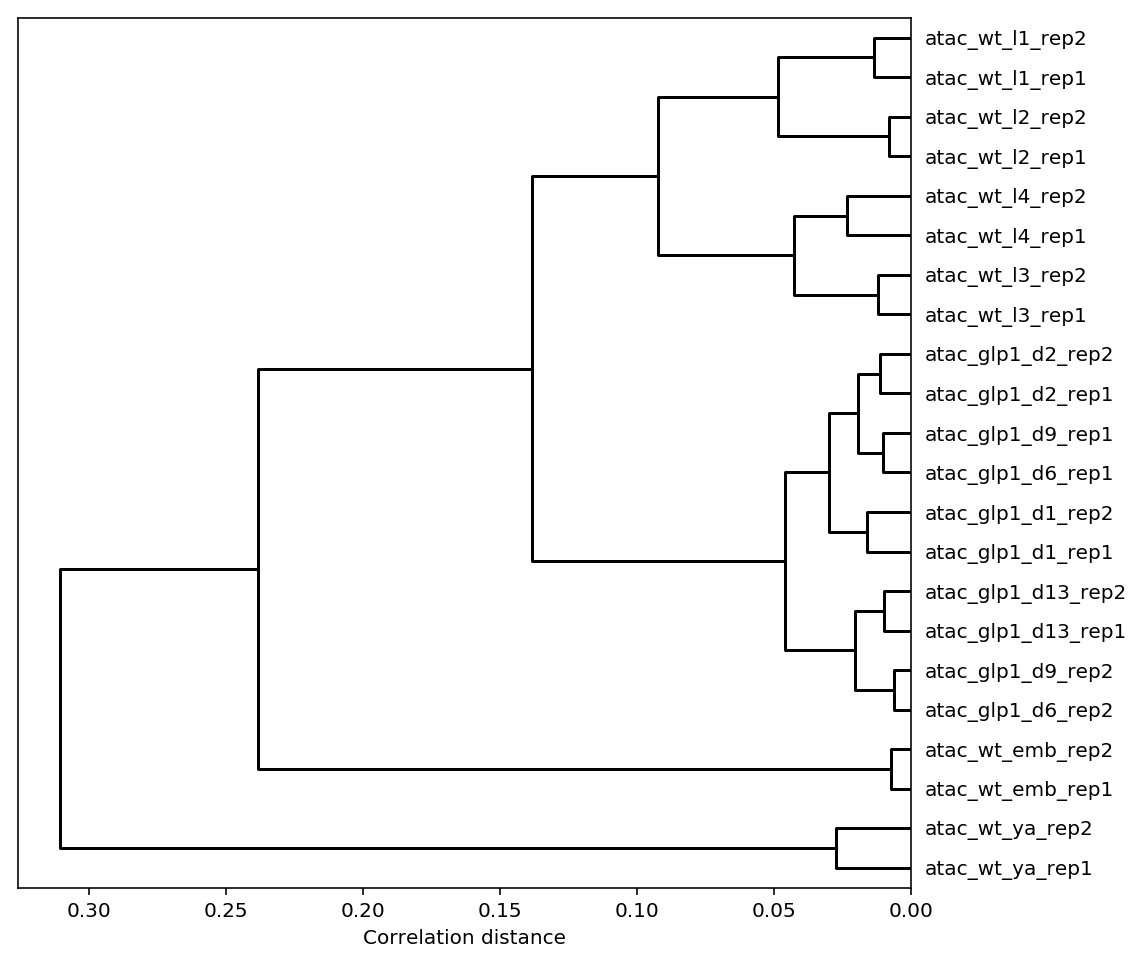

In [18]:
df_merged['atac_max_height'] = df_merged[['atac_%(stage)s_height' % locals() for stage in config['stages_rep']]].max(axis=1)
df_merged['atac_max_rank'] = df_merged['atac_max_height'].rank(ascending=False)

#.query('(0 <= atac_max_rank) & (atac_max_rank <= 10000)')
counts_ = df_merged[['atac_%s_height' % (ll,) for ll in config['stages_rep']]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(counts_, metric='correlation', method='complete')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s' % (ll,) for ll in config['stages_rep']], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
plt.savefig('annot/FigA_clustering/reproducibility_atac.pdf', bbox_inches='tight')

In [14]:
#counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_]].values.T
#linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation', method='complete')
#plt.figure(figsize=(8,24))
#r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_], orientation='left', 
#                                  color_threshold=-1.0, above_threshold_color='k', leaf_font_size=11)
#plt.gca().set_xlabel('Correlation distance')
#plt.savefig('annot/FigA_clustering/reproducibility_atac_all.pdf', bbox_inches='tight')

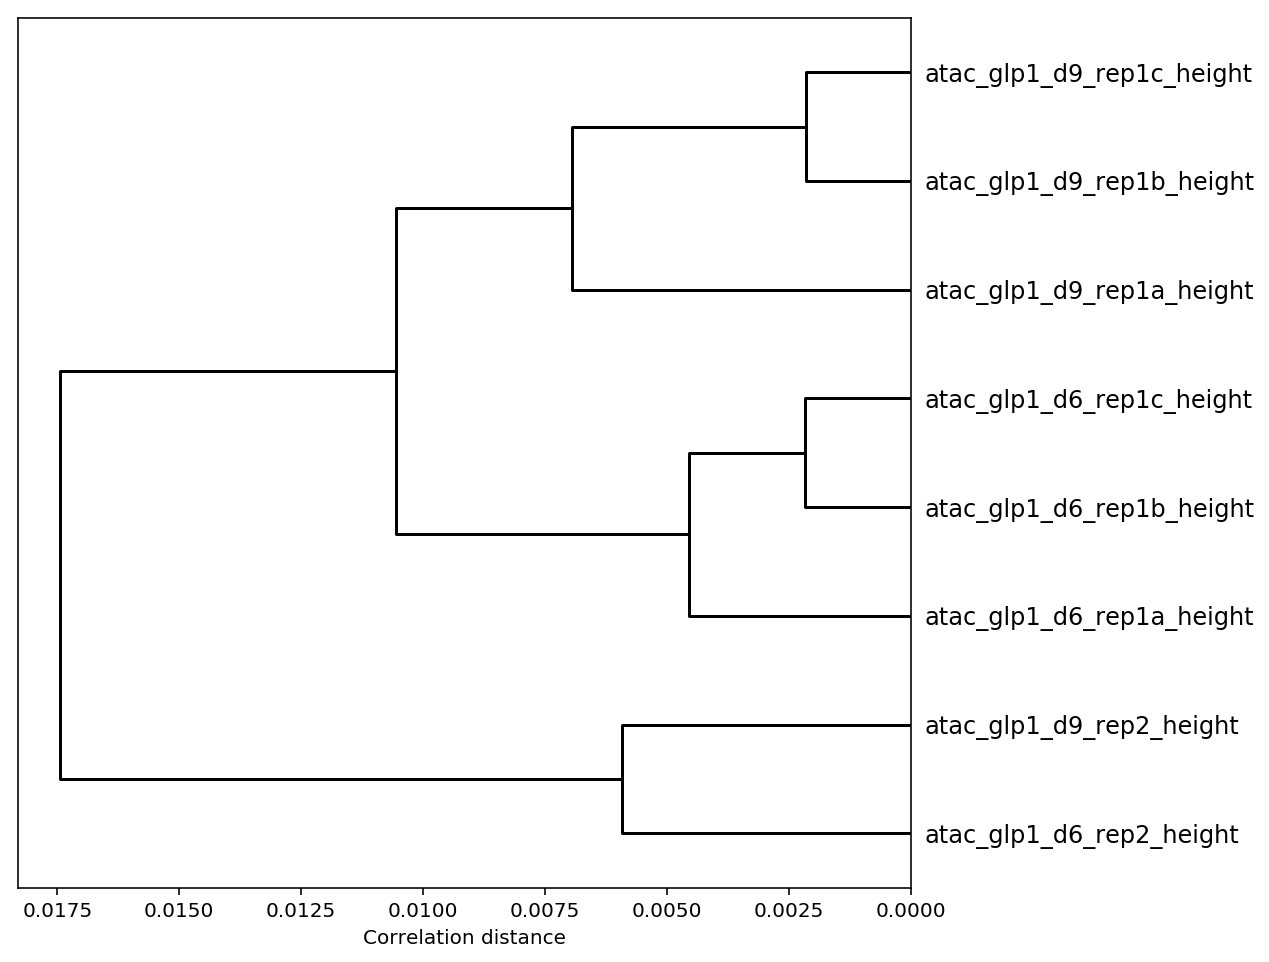

In [16]:
l_glp1_ = [
    'glp1_d6_rep1a',
    'glp1_d6_rep1b',
    'glp1_d6_rep1c',
    'glp1_d6_rep2',
    'glp1_d9_rep1a',
    'glp1_d9_rep1b',
    'glp1_d9_rep1c',
    'glp1_d9_rep2',
]

counts_ = df_merged[['atac_%s_height' % (ll,) for ll in l_glp1_]].values.T
linkage_matrix = sp.cluster.hierarchy.linkage(np.nan_to_num(counts_), metric='correlation')
plt.figure(figsize=(8,8))
r=sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=['atac_%s_height' % (ll,) for ll in l_glp1_], orientation='left', 
                                  color_threshold=-1.0, above_threshold_color='k')
plt.gca().set_xlabel('Correlation distance')
plt.savefig('annot/FigA_clustering/reproducibility_atac_d6_d9.pdf', bbox_inches='tight')